**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 11/02/2025**

**Time: 11:00 AM**

# **KNN Classifier**

1. Your task is to develop a model to predict whether a patient has diabetes based on specific diagnostic measurements.

**Dataset:**

The Pima Indians Diabetes Database, available on Kaggle, contains medical data for female patients of Pima Indian heritage aged 21 and above. The dataset includes the following features:
- Number of pregnancies
- Plasma glucose concentration
- Diastolic blood pressure
- Triceps skinfold thickness
- 2-Hour serum insulin
- Body mass index (BMI)
- Diabetes pedigree function
- Age

The target variable indicates whether the patient has diabetes (1) or not (0). Link(https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

**Approach:**

• **Data Exploration and Preprocessing:**
1. Analyze the distribution of each feature.
2. Handle missing values (if any) appropriately.
3. Perform feature scaling if required

• **Model Implementation:**
1. Implement the K-Nearest Neighbors (KNN) classifier using Scikit-learn.
2. Experiment with different values of K (number of neighbours) and find the optimal value.
3. Use Euclidean distance as the similarity measure.

• **Performance Evaluation:**
1. Evaluate the model using accuracy, precision, and recall metrics.
2. Plot a confusion matrix to evaluate classification performance.
3. Compare model performance for different values of K.

Example code: Link(https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

• **Observational Questions:**
1. Identify any two limitations of KNN for this dataset.
2. What happens when K is too small or too large?

In [96]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [46]:
# load dataset
ds = pd.read_csv('diabetes.csv')
ds.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Exploration and Preprocessing:**

In [47]:
# Analyze the distribution of each feature.
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
# Perform feature scaling if required
scalar = StandardScaler()
cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ds[cols_to_scale] = scalar.fit_transform(ds[cols_to_scale])

# After Scaling
ds.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# **Model Implementation:**

In [49]:
# Define features (X) and target (y)
X = ds.drop('Outcome', axis=1)
y = ds['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Experiment with different values of K
k_values = range(1, 101) # Test K values from 1 to 100
accuracy_scores = []
precision_scores = []
recall_scores = []

In [75]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Use Euclidean distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# **Performance Evaluation:**

In [86]:
# Find the best K based on accuracy
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Best K: {best_k}, Accuracy: {round(max(accuracy_scores)*100,2)}%")

Best K: 85, Accuracy: 77.92%


In [87]:
# Evaluate the best model
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

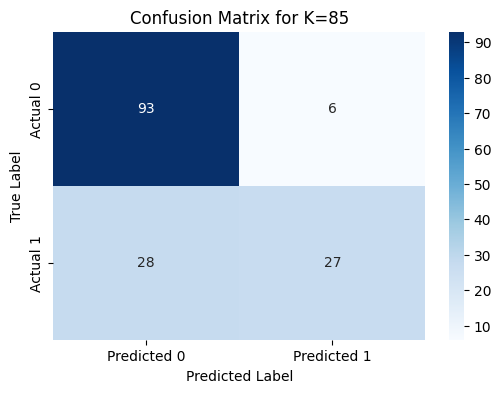

In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for K={best_k}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

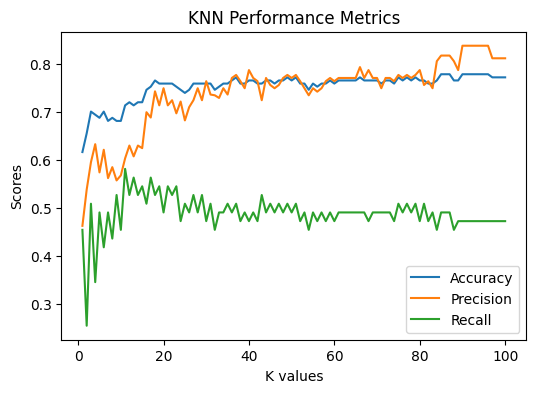

In [95]:
# Plotting Accuracy, Precision and Recall for different K values
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy_scores, label="Accuracy")
plt.plot(k_values, precision_scores, label="Precision")
plt.plot(k_values, recall_scores, label="Recall")
plt.xlabel("K values")
plt.ylabel("Scores")
plt.legend()
plt.title('KNN Performance Metrics')
plt.show()

# **Observational Questions:**

**1. Identify any two limitations of KNN for this dataset.**

1. **Sensitivity to irrelevant features:**  KNN can be affected by features that don't strongly correlate with the target variable.
2. **Computationally expensive for large datasets:** Calculating distances to all data points becomes slow as dataset size increases.

**2. What happens when K is too small or too large?**

**Small K:** High variance, overfitting to noise.  Large K: High bias, underfitting, model too smooth.